<a href="https://colab.research.google.com/github/M-Awwab-Khan/spam-sms-classifier/blob/main/sms_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPAM MESSAGES CLASSIFIER

### Workflow
This project will be divided in to 7 parts namely
1. Data Cleaning
2. Exploratory Data Analysis
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Application

### Importing Modules

In [1]:
import pandas as pd
import numpy as np

### Loading Dataset

In [3]:
df = pd.read_csv('spam.csv', encoding='latin')

### Basic Data Exploration

How our data looks like?

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


What are the dimensions of our dataset?

In [5]:
df.shape

(5572, 5)

What are the columns and their datatypes?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Are there any missing values?

In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Are there any duplicate values?

In [14]:
df.duplicated().sum()

403

### Data Cleaning

First of all drop the unnamed columns as these columns do not contain useful values.

In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

Now let's rename the remaining columns to be more descriptive

In [9]:
df.rename(columns={'v1': 'target', 'v2': 'message'}, inplace=True)

In [10]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Before going any further, let's just encode the target variable using sklearn's LabelEncoder

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Unfortunately, as we saw earlier our dataset contains duplicate values. Therefore it is crucial to remove those entries.

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

### Exploratory Data Analysis

Let's first see how  ham and spam values are distributed in our dataset.

In [18]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

To better visualize it, we are gonna use matplolib's pie plot.

In [19]:
import matplotlib.pyplot as plt

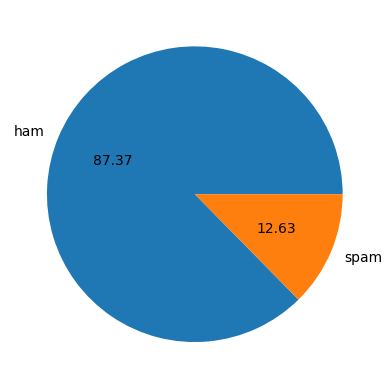

In [20]:
plt.pie(df.target.value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

Hence we are sure that our data is **imbalanced** meaning there are more ham than spam.